# HW 1 Supplymentary Code File
Haoynag Han

Here are some useful codes for problem solving.

## Exercise 2.8

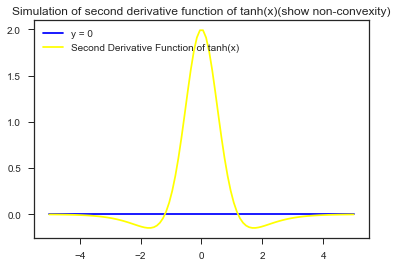

In [24]:
# import several libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

# z is the second derivative function of tanh(x)
x = np.linspace(-5,5,100)
l = np.zeros(100)
y = x*np.tanh(x)
z = (2 - 2 * x * np.tanh(x))*(1 - np.tanh(x)**2)


# image_plotter
plt.plot(x,l, color = 'blue', label = 'y = 0')
plt.plot(x,z, color = 'yellow', label = "Second Derivative Function of tanh(x)")
plt.legend(loc = 2)
plt.title("Simulation of second derivative function of tanh(x)(show non-convexity)")
plt.show()

## Exercise 2.13

Attention that in a more generlized condition, we could simply import <font color=#00bzgf>autograd</font> to help us solve with problems.


/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


The final average norm of the gradient = 0.011667426577188758
The final average norm of the gradient = 4.415498975500648e-11


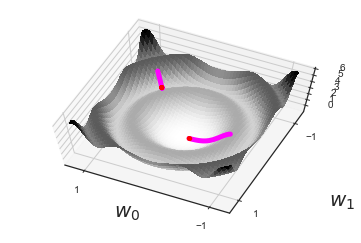

In [3]:
 # two_d_grad_wrapper_hw is a toy wrapper to illustrate the path
 # taken by gradient descent depending on the learning rate (alpha) chosen.
 # Here alpha is kept fixed and chosen by the use. The corresponding
 # gradient steps, evaluated at the objective, are then plotted.  The plotted points on
 # the objective turn from green to red as the algorithm converges (or
 # reaches a maximum iteration count, preset to 50).
 # (nonconvex) function here is
 #
 # g(w) = -cos(2*pi*w'*w) + 2*w'*w

 # This file is associated with the book
 # "Machine Learning Refined", Cambridge University Press, 2016.
 # by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

from pylab import *
from mpl_toolkits.mplot3d import Axes3D



###### ML Algorithm functions ######
def gradient_descent(w0,alpha):
    w = w0
    g_path = []
    w_path = []
    w_path.append(w)
    g_path.append(-cos(2*pi*dot(w.T,w)) + 2*dot(w.T,w))

    # start gradient descent loop
    grad = 1
    iter = 1
    max_its = 50
    while linalg.norm(grad) > 10**(-5) and iter <= max_its:
        # take gradient step
# --->  grad = 
        grad = sin(2*pi*dot(w.T, w))*4*pi*w + 2*w
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        g_path.append(-cos(2*pi*dot(w.T,w)) + 2*dot(w.T,w))
        iter+= 1
    g_path = asarray(g_path)
    g_path.shape = (iter,1)
    w_path = asarray(w_path)
    w_path.shape = (iter,2)

    # show final average gradient norm for sanity check
    s = dot(grad.T,grad)/2
    s = 'The final average norm of the gradient = ' + str(float(s))
    print(s)


    # # for use in testing if algorithm minimizing/converging properly
    # plot(asarray(obj_path))
    # show()

    return (w_path,g_path)

###### plotting functions #######
def make_function():
    global fig,ax1

    # prepare the function for plotting
    r = linspace(-1.15,1.15,300)
    s,t = meshgrid(r,r)
    s = reshape(s,(size(s),1))
    t = reshape(t,(size(t),1))
    h = concatenate((s,t),1)
    h = dot(h*h,ones((2,1)))
    b = -cos(2*pi*h) + 2*h
    s = reshape(s,(sqrt(size(s)),sqrt(size(s))))
    t = reshape(t,(sqrt(size(t)),sqrt(size(t))))
    b = reshape(b,(sqrt(size(b)),sqrt(size(b))))

    # plot the function
    fig = plt.figure(facecolor = 'white')
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(s,t,b,cmap = 'Greys',antialiased=False) # optinal surface-smoothing args rstride=1, cstride=1,linewidth=0
    ax1.azim = 115
    ax1.elev = 70

    # pretty the figure up
    ax1.xaxis.set_rotate_label(False)
    ax1.yaxis.set_rotate_label(False)
    ax1.zaxis.set_rotate_label(False)
    ax1.get_xaxis().set_ticks([-1,1])
    ax1.get_yaxis().set_ticks([-1,1])
    ax1.set_xlabel('$w_0$   ',fontsize=20,rotation = 0,linespacing = 10)
    ax1.set_ylabel('$w_1$',fontsize=20,rotation = 0,labelpad = 50)
    ax1.set_zlabel('   $g(\mathbf{w})$',fontsize=20,rotation = 0,labelpad = 20)

def plot_steps(w_path,g_path):
    # colors for points
    ax1.plot(w_path[:,0],w_path[:,1],g_path[:,0],color = [1,0,1],linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    ax1.plot(w_path[-8:-1,0],w_path[-8:-1,1],g_path[-8:-1,0],color = [1,0,0],linewidth = 5)   # add a little to output path so its visible on top of the surface plot


def main():
    make_function()                             # plot objective function

    # plot first run on surface
    alpha = 10**-2
    w0 = array([-0.7,0])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha)    # perform gradient descent
    plot_steps(w_path,g_path)

    # plot second run on surface
    w0 = array([0.8,-0.8])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha)    # perform gradient descent
    plot_steps(w_path,g_path)
    show()
main()


## Exercise 2.17

In [27]:
 # two_d_grad_wrapper_hw is a toy wrapper to illustrate the path
 # taken by gradient descent depending on the learning rate (alpha) chosen.
 # Here alpha is kept fixed and chosen by the use. The corresponding
 # gradient steps, evaluated at the objective, are then plotted.  The plotted points on
 # the objective turn from green to red as the algorithm converges (or
 # reaches a maximum iteration count, preset to 50).
 # (nonconvex) function here is
 #
 # g(w) = -cos(2*pi*w'*w) + 2*w'*w

 # This file is associated with the book
 # "Machine Learning Refined", Cambridge University Press, 2016.
 # by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.


# define functions
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy import matmul as mm

# DEF First and Second derivative of target functon.
# note here x is a matrix

def d_fun(w):
    return (1-1/(1+exp(dot(w.T, w))))* 2 * w
def dd_fun(w):
    return (4*np.exp(-np.dot(w.T,w))*np.dot(w,w.T) + 2*(1+np.exp(-np.dot(w.T,w)))*np.array([1,0,0,1]).reshape(2,2))/(1+np.exp(-np.dot(w.T,w)))**2

In [28]:

# function effectiveness test 
w = array([1,1])
w.shape = (2,1)
w1 = d_fun(w)
w2 = dd_fun(w)
# w = w - mm(inv(dd_fun(w)),d_fun(w))
w2


array([[ 2.1815685 ,  0.41997434],
       [ 0.41997434,  2.1815685 ]])

The final average norm of the gradient = 0.0005502731322048045


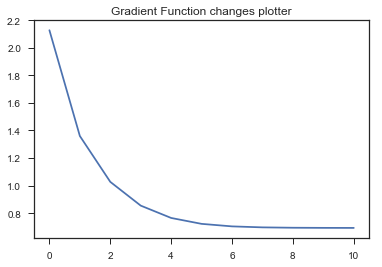

The final average norm of the gradient = 0.00934568396446285


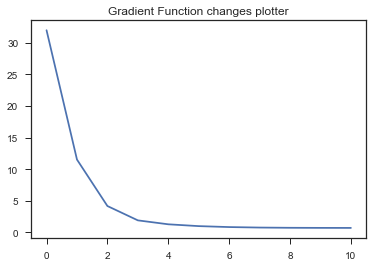

In [57]:
# Newton's Method
###### ML Algorithm functions ######
def gradient_descent(w0,alpha, m_its):
    w = w0
    g_path = []
    w_path = []
    w_path.append(w)
    g_path.append(log(1 + exp(dot(w.T,w))))

    # start gradient descent loop
    grad = 1
    iter = 1
    max_its = m_its
    while linalg.norm(grad) > 10**(-5) and iter <= max_its:
        # take gradient step
# --->  grad = 
        grad = d_fun(w)
        # Hessian
        hess = dd_fun(w)
        w = w - alpha*mm(inv(dd_fun(w)),d_fun(w))

        # update path containers
        w_path.append(w)
        g_path.append(log(1 + exp(dot(w.T,w))))
        iter+= 1
    g_path = asarray(g_path)
    g_path.shape = (iter,1)
    w_path = asarray(w_path)
    w_path.shape = (iter,2)

    # show final average gradient norm for sanity check
    s = dot(grad.T,grad)/2
    s = 'The final average norm of the gradient = ' + str(float(s))
    print(s)


    # # for use in testing if algorithm minimizing/converging properly
    # plot(asarray(obj_path))
    # show()

    return (w_path,g_path)
def plotter():
    x = range(1,10)
    plt.plot(x, g_path)
    plt.title("Gradient Function changes plotter")
    plt.show()
    

def main():
    # for problem 3
    alpha = 0.4
    max_iter = 10
    w0 = array([1,1])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha, max_iter)    # perform gradient descent
    x = range(0,max_iter+1)
    plt.plot(x, g_path[:,0])
    plt.title("Gradient Function changes plotter")
    plt.show()


    # for problem 4
    max_iter = 10
    w0 = array([4,4])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha, max_iter)    # perform gradient descent
    x = range(0,max_iter+1)
    plt.plot(x, g_path[:,0])
    plt.title("Gradient Function changes plotter")
    plt.show()
main()

The final average norm of the gradient = 0.001036646063374031


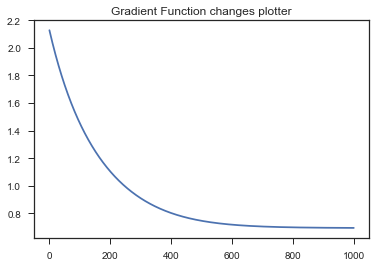

The final average norm of the gradient = 0.02135214895367138


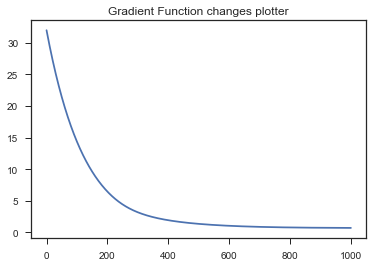

In [58]:
# a test for discussion part. Reduce the learn rate and increase iteration times to make function smooth
def main():
    alpha = 0.004
    max_iter = 1000
    w0 = array([1,1])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha, max_iter)    # perform gradient descent
    x = range(0,max_iter+1)
    plt.plot(x, g_path[:,0])
    plt.title("Gradient Function changes plotter")
    plt.show()



    max_iter = 1000
    w0 = array([4,4])
    w0.shape = (2,1)
    w_path,g_path = gradient_descent(w0,alpha, max_iter)    # perform gradient descent
    x = range(0,max_iter+1)
    plt.plot(x, g_path[:,0])
    plt.title("Gradient Function changes plotter")
    plt.show()
main()